### Importing Libraries

In [1]:
# Pre Processing 
import pandas as pd
import datetime as dt
import numpy as np

# Exploratory Data
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline

# Pycaret Environment
from pycaret.classification import setup
from pycaret.classification import compare_models
from pycaret.classification import *

### Load Credit Risk Dataset

In [2]:
Credits = pd.read_csv('credit_risk_dataset.csv')
pd.set_option('display.max_columns', None)
Credits.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


### Renaming Columns of Dataset

 - Renaming all of the `features` name so that it will be easier to read and interprete.

In [3]:
# Renaming Columns to their appropriate Names
col_names = ['Age', 'Income', 'Home Ownership', 'EMP Length', 'Loan Intent', 'Loan Grade', 'Loan Amount','Loan Int Rate','Loan Status',
             'Loan Percent Inc','Default','Credit History']
Credits.columns = col_names

Credits.head(5)

,Age,Income,Home Ownership,EMP Length,Loan Intent,Loan Grade,Loan Amount,Loan Int Rate,Loan Status,Loan Percent Inc,Default,Credit History
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Dataset Profiling

In [4]:
print("Dataset dimension :", Credits.ndim)
print("Dataset shape :", Credits.shape)
print("Dataset size :", Credits.size)

Dataset dimension : 2
Dataset shape : (32581, 12)
Dataset size : 390972


In [5]:
credits_types = Credits.dtypes.reset_index()
credits_types.columns = ['Features','Data Type']
credits_types

,Features,Data Type
0,Age,int64
1,Income,int64
2,Home Ownership,object
3,EMP Length,float64
4,Loan Intent,object
5,Loan Grade,object
6,Loan Amount,int64
7,Loan Int Rate,float64
8,Loan Status,int64
9,Loan Percent Inc,float64


### Dataset Inspection

### Checking For Missing and Blank Values

In [6]:
miss_data = Credits.isnull().sum().reset_index()
miss_data.columns = ['Features','Missing Values']
blank_data = Credits.apply(lambda x: x == ' ').sum().reset_index()
blank_data.columns = ['Features','Blank Values']
merged_data = pd.merge(miss_data,blank_data, on=['Features'])
merged_data['Filling Factor'] = (Credits.shape[0]-miss_data['Missing Values'] + Credits.shape[0]-blank_data['Blank Values'])/Credits.shape[0]*50
merged_data.sort_values(by='Filling Factor',ascending = True)

,Features,Missing Values,Blank Values,Filling Factor
7,Loan Int Rate,3116,0,95.218072
3,EMP Length,895,0,98.626500
0,Age,0,0,100.000000
1,Income,0,0,100.000000
2,Home Ownership,0,0,100.000000
4,Loan Intent,0,0,100.000000
5,Loan Grade,0,0,100.000000
6,Loan Amount,0,0,100.000000
8,Loan Status,0,0,100.000000
9,Loan Percent Inc,0,0,100.000000


 - Missing values are spotted on both `Loan interest Rate` and `EMP Length` features. Dataset cleaning needs to be performed. 
 - First we may want to confirm missing values using ASSERT Statement.

### Cross Checking Missing Values with ASSERT Statement

In [7]:
# Assert that there are no missing values in the dataframe

assert pd.notnull(Credits).all().all()

AssertionError: 

Interpretation
 - Above code will throw an `error` message when there are any missing values detected in dataset, otherwise then the data is already clean.
 - Because of the above command does indeed throw an error. Hence, it is confirmed that there are missing or negative values in the dataset.
 - Some of the values are lesser than zero excluding character values.

### Dataset Overview

In [8]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))
        
initial_eda(Credits)

Dimensions : 32581 rows, 12 columns
Total NA Values : 4011 
                           Column Name  Data Type      #Distinct  NA Values
                                   Age      int64           58          0
                                Income      int64         4295          0
                        Home Ownership     object            4          0
                            EMP Length    float64           36        895
                           Loan Intent     object            6          0
                            Loan Grade     object            7          0
                           Loan Amount      int64          753          0
                         Loan Int Rate    float64          348       3116
                           Loan Status      int64            2          0
                      Loan Percent Inc    float64           77          0
                               Default     object            2          0
                        Credit History      int64 

### Explore Categorical Variables

In [9]:
categorical = [var for var in Credits.columns if Credits[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 4 categorical variables

The categorical variables are :

 ['Home Ownership', 'Loan Intent', 'Loan Grade', 'Default']


### Categorical Variables Distinct Values Distribution

In [10]:
for var in categorical: 
    
    print(Credits[var].value_counts())

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: Home Ownership, dtype: int64
EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: Loan Intent, dtype: int64
A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: Loan Grade, dtype: int64
N    26836
Y     5745
Name: Default, dtype: int64


### Data Cleaning

### `Loan Status` Feature Transformation

In [11]:
Credits['Loan Status'] = Credits['Loan Status'].astype(object)
Credits['Loan Status'] = Credits['Loan Status'].replace([0,1],['No','Yes'])

# Cross Checking its distinct value
LS_count = Credits['Loan Status'].value_counts().reset_index()
LS_count.columns = ['Loan Status','Total Count']
LS_count.sort_values(by='Total Count',ascending=False)

,Loan Status,Total Count
0,No,25473
1,Yes,7108


### `Default` Feature Handling

In [12]:
Credits['Default'] = Credits['Default'].replace(['N','Y'],['No','Yes'])

# Cross Checking its distinct value
DF_count = Credits['Default'].value_counts().reset_index()
DF_count.columns = ['Default','Total Count']
DF_count.sort_values(by='Total Count',ascending=False)

,Default,Total Count
0,No,26836
1,Yes,5745


### `EMP Length` Feature Missing Values Handling

In [13]:
# Replace Nan to value to median of EMP feature
meds = Credits['EMP Length'].median()
Credits['EMP Length'] = Credits['EMP Length'].fillna(value=meds)

# Double Checking Missing Values
EL_fill = Credits['EMP Length'].isnull().sum()

print('EMP Length Missing Value',EL_fill)

EMP Length Missing Value 0


In [14]:
# Cross Checking its distinct value
IC_count = Credits['EMP Length'].value_counts().reset_index()
IC_count.columns = ['EMP Length','Total Count']
IC_count.sort_values(by='Total Count',ascending=False)

,EMP Length,Total Count
0,0.0,4105
1,2.0,3849
2,4.0,3769
3,3.0,3456
4,5.0,2946
5,1.0,2915
6,6.0,2666
7,7.0,2196
8,8.0,1687
9,9.0,1367


### `Loan Int Rate` Feature Missing Values Handling

In [15]:
# Replace Nan to value to median of Loan Int Rate feature
meds2 = Credits['Loan Int Rate'].median()
Credits['Loan Int Rate'] = Credits['Loan Int Rate'].fillna(value=meds2)

# Double Checking Missing Values
LR_fill = Credits['Loan Int Rate'].isnull().sum()

print('Loan Int Rate Missing Value',LR_fill)

Loan Int Rate Missing Value 0


In [16]:
# Cross Checking its distinct value
LR_count = Credits['Loan Int Rate'].reset_index()
LR_count.columns = ['Loan Int Rate','Total Count']
LR_count.sort_values(by='Total Count',ascending=False)

,Loan Int Rate,Total Count
29277,29277,23.22
27851,27851,22.48
27425,27425,22.11
13499,13499,22.11
6449,6449,22.11
...,...,...
2491,2491,5.42
26229,26229,5.42
26219,26219,5.42
26185,26185,5.42


### Cross Checking Dataset with ASSERT Statement

In [17]:
# Assert that there are no missing values in the dataframe

assert pd.notnull(Credits).all().all()

 - The above command does not throw any error. Hence, it is confirmed that there are no missing or negative values in the dataset.
 - All the values are greater than or equal to zero excluding character values.

### Exploratory Data

### Dataset Basic Statistics

In [18]:
Credits.describe()

,Age,Income,EMP Length,Loan Amount,Loan Int Rate,Loan Percent Inc,Credit History
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.767994,9589.371106,11.009620,0.170203,5.804211
std,6.348078,6.198312e+04,4.087372,6322.086646,3.081611,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000


### Numerical Features Plot

In [19]:
numerical = [var for var in Credits.columns if Credits[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 7 numerical variables

The numerical variables are :

 ['Age', 'Income', 'EMP Length', 'Loan Amount', 'Loan Int Rate', 'Loan Percent Inc', 'Credit History']


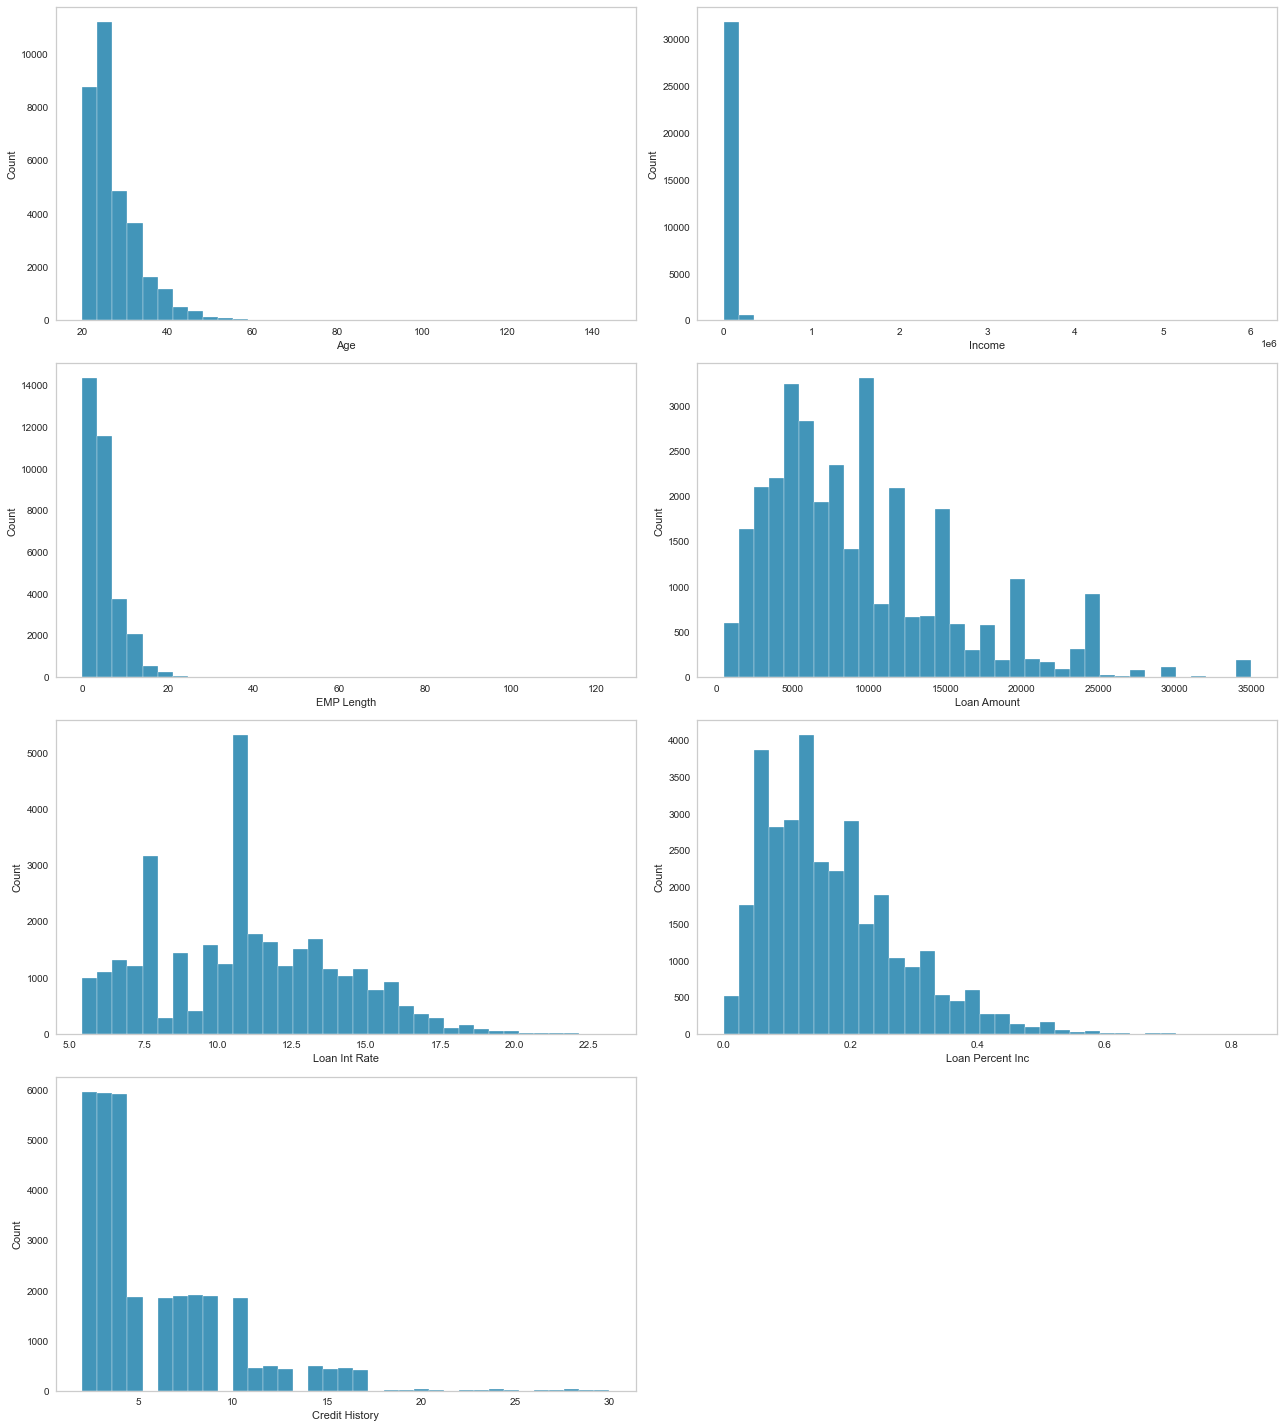

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

Credits_num = Credits[['Age', 'Income', 'EMP Length', 'Loan Amount', 'Loan Int Rate', 'Loan Percent Inc', 'Credit History']]

plt.figure(figsize=(18, 20))
for i in range(0, len(list(Credits_num))):
    plt.subplot(4, 2, i+1)
    sns.histplot(x=Credits[list(Credits_num)[i]],bins = 35)
    plt.tight_layout()

### Outliers

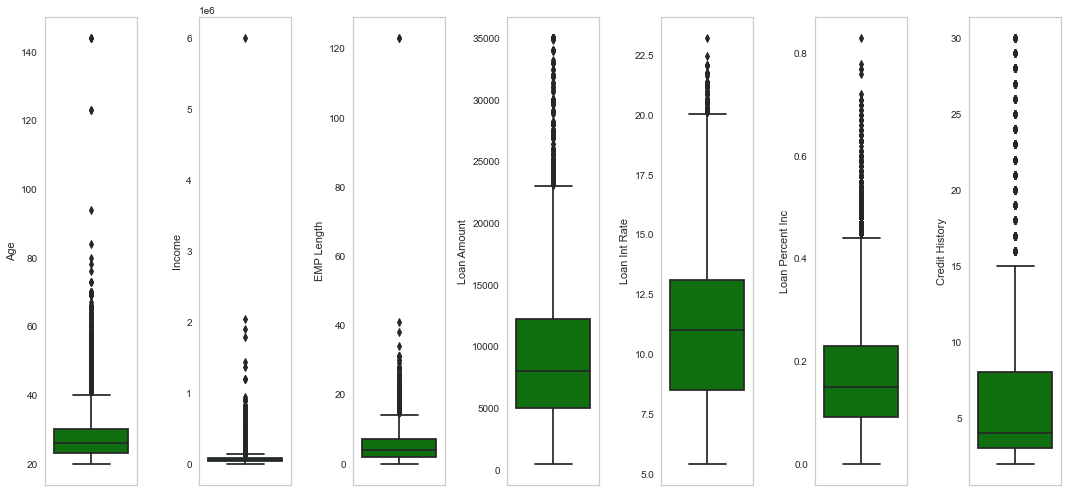

In [21]:
plt.figure(figsize=(15, 7))
for i in range(0, len(list(Credits_num))):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=Credits[list(Credits_num)[i]],color='green',orient='v')
    plt.tight_layout()

### Correlation

In [22]:
# plot correlation heatmap to find out correlations

Credits.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Age,Income,EMP Length,Loan Amount,Loan Int Rate,Loan Percent Inc,Credit History
Age,1.0,0.1732,0.1615,0.05079,0.01185,-0.04241,0.8591
Income,0.1732,1.0,0.1352,0.2668,0.0007464,-0.2545,0.118
EMP Length,0.1615,0.1352,1.0,0.1139,-0.05126,-0.05413,0.1431
Loan Amount,0.05079,0.2668,0.1139,1.0,0.1395,0.5726,0.04197
Loan Int Rate,0.01185,0.0007464,-0.05126,0.1395,1.0,0.1145,0.01576
Loan Percent Inc,-0.04241,-0.2545,-0.05413,0.5726,0.1145,1.0,-0.03169
Credit History,0.8591,0.118,0.1431,0.04197,0.01576,-0.03169,1.0


### Home Ownership Distribution

Text(0.5, 1.0, 'Home Ownership Distribution')

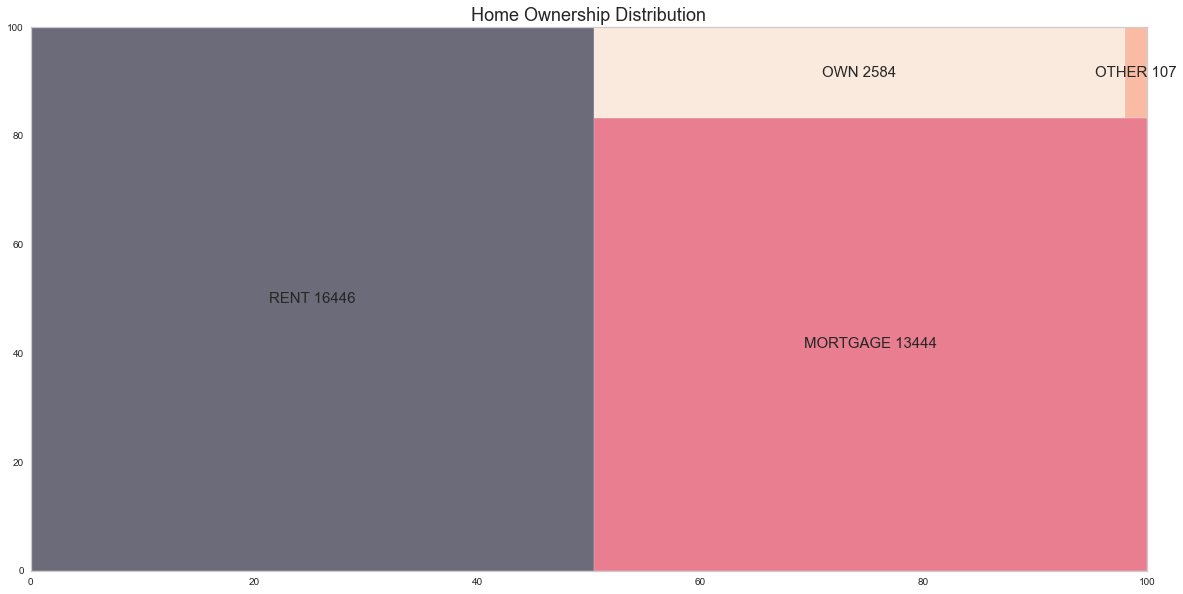

In [23]:
#Plot 1
fig1=plt.figure(figsize=(20,10))
size1 = Credits.groupby('Home Ownership',)['Home Ownership'].count().sort_values(ascending= False).tolist() 
label1 = Credits.groupby('Home Ownership',)['Home Ownership'].count().sort_values(ascending= False).index.values.tolist()
label1 = [i+" "+j for i, j in zip(label1, [str(x) for x in size1])]
ax1 = squarify.plot(sizes=size1, label=label1, alpha=.6, text_kwargs={'fontsize':15})
ax1.set_title('Home Ownership Distribution', fontsize=18, fontweight='normal')

### Loan Intent and Grade Distribution

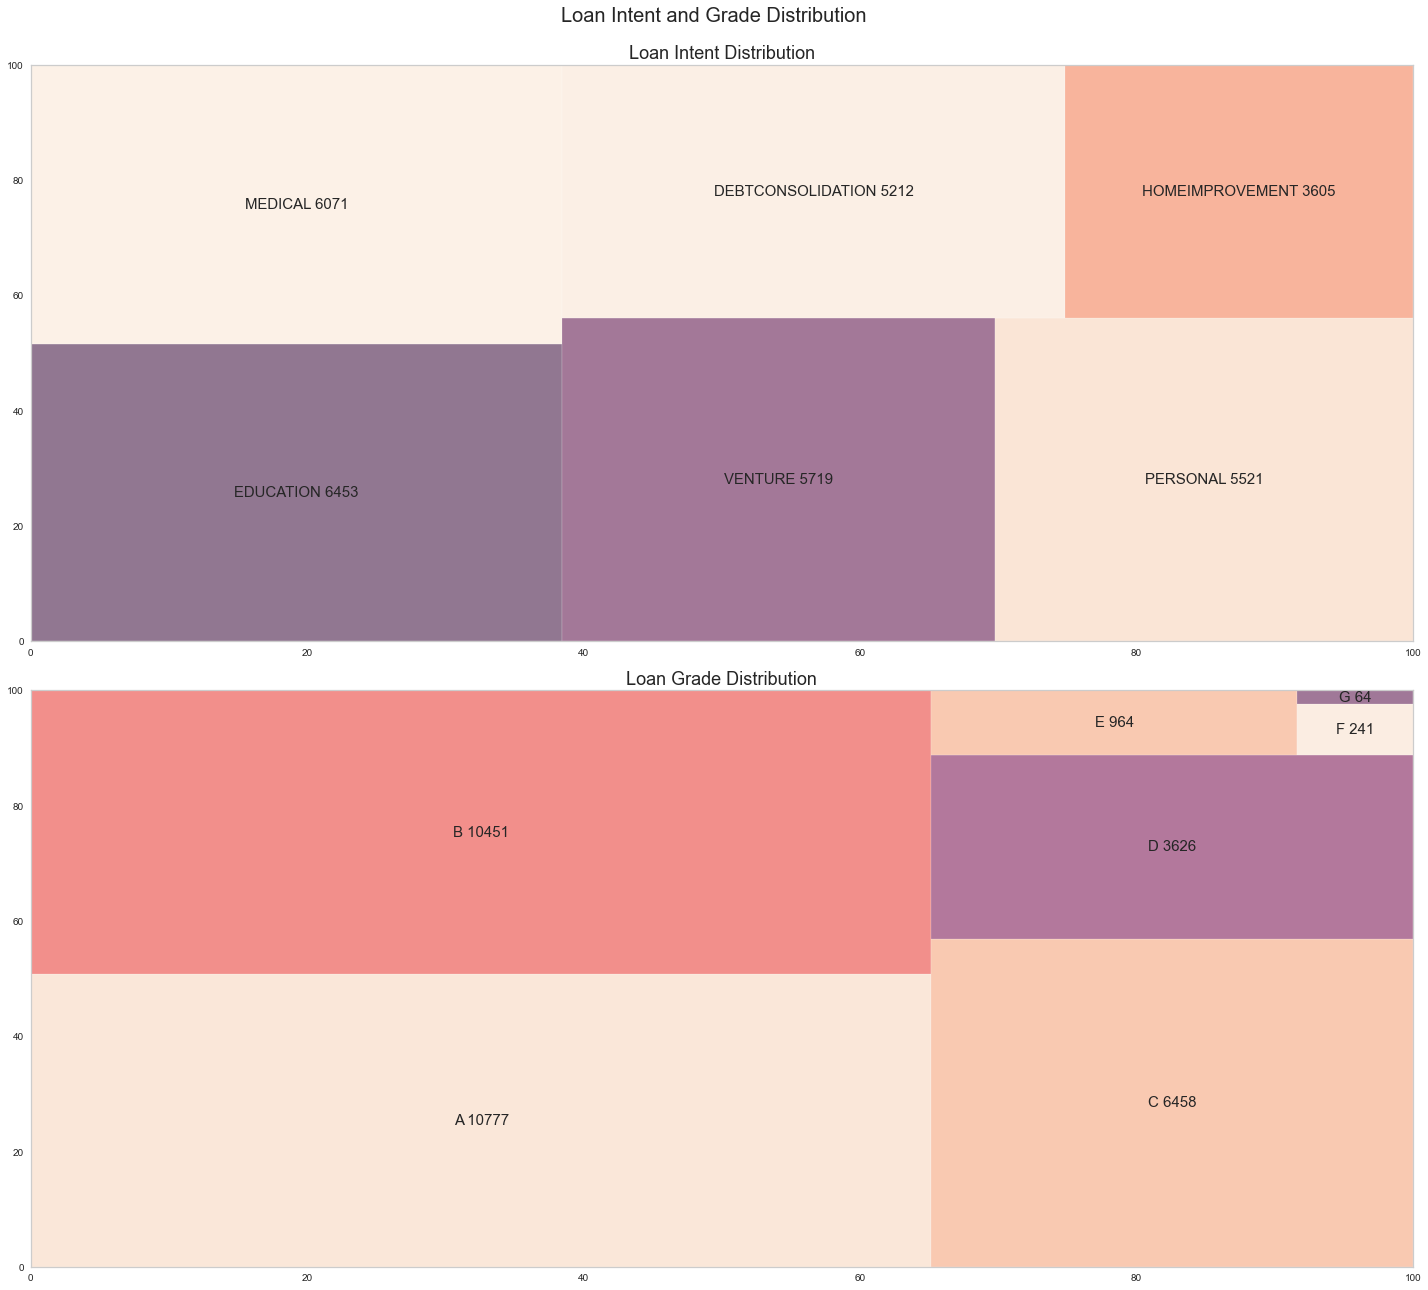

In [24]:
fig, (ax2, ax3) = plt.subplots(2, 1,figsize=(20,18))
fig.suptitle("Loan Intent and Grade Distribution", fontsize=20, verticalalignment="bottom")
 
#Plot 1
plt.subplot(2,1,1)
size2 = Credits.groupby('Loan Intent',)['Loan Intent'].count().sort_values(ascending= False).tolist() 
label2 = Credits.groupby('Loan Intent',)['Loan Intent'].count().sort_values(ascending= False).index.values.tolist()
label2 = [i+" "+j for i, j in zip(label2, [str(x) for x in size2])]
ax2 = squarify.plot(sizes=size2, label=label2, alpha=.6, text_kwargs={'fontsize':15})
ax2.set_title('Loan Intent Distribution', fontsize=18, fontweight='normal')

#Plot 2
plt.subplot(2,1,2)
size3 = Credits.groupby('Loan Grade',)['Loan Grade'].count().sort_values(ascending= False).tolist() 
label3 = Credits.groupby('Loan Grade',)['Loan Grade'].count().sort_values(ascending= False).index.values.tolist()
label3 = [i+" "+j for i, j in zip(label3, [str(x) for x in size3])]
ax3 = squarify.plot(sizes=size3, label=label3, alpha=.6, text_kwargs={'fontsize':15})
ax3.set_title('Loan Grade Distribution', fontsize=18, fontweight='normal')

plt.tight_layout()

### Categorical Plotting In Respect to Target Feature `Loan Status`

### Frequency Distribution of `Loan Status` per `Default`

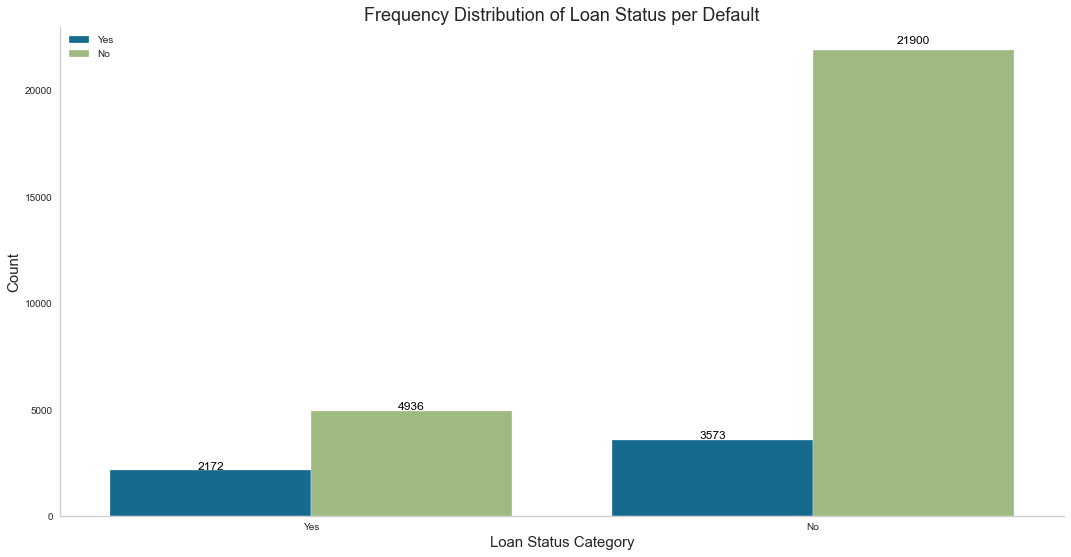

In [25]:
fig7=plt.figure(figsize=(18,9))
ax7 = sns.countplot(x='Loan Status', hue='Default', data=Credits)
for i in ax7.patches:    
    ax7.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 12, rotation = 0, color = 'black')
ax7.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax7.set_xlabel('Loan Status Category',fontsize=15,fontweight='normal') 
ax7.spines['right'].set_visible(False)
ax7.spines['top'].set_visible(False)
ax7.set_title('Frequency Distribution of Loan Status per Default',fontsize=18, fontweight='normal')
ax7.legend(loc='upper left')

### Frequency Distribution of `Loan Status` per `Home Ownership`

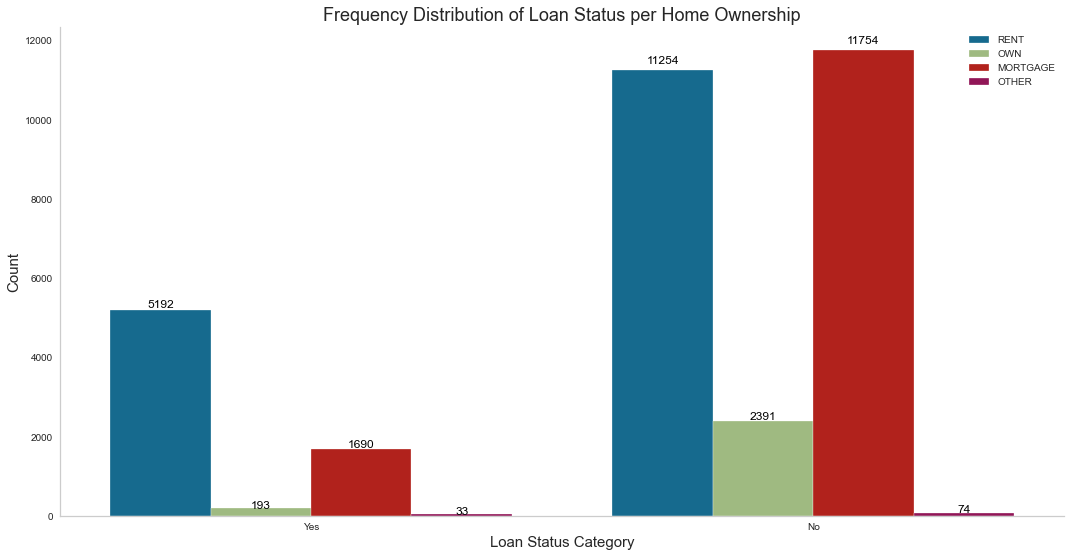

In [26]:
fig4=plt.figure(figsize=(18,9))
ax4 = sns.countplot(x='Loan Status', hue='Home Ownership', data=Credits)
for i in ax4.patches:    
    ax4.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 12, rotation = 0, color = 'black')
ax4.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax4.set_xlabel('Loan Status Category',fontsize=15,fontweight='normal') 
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title('Frequency Distribution of Loan Status per Home Ownership',fontsize=18, fontweight='normal')
ax4.legend(loc='upper right')

### Frequency Distribution of `Loan Status` per `Loan Intent and Grade`

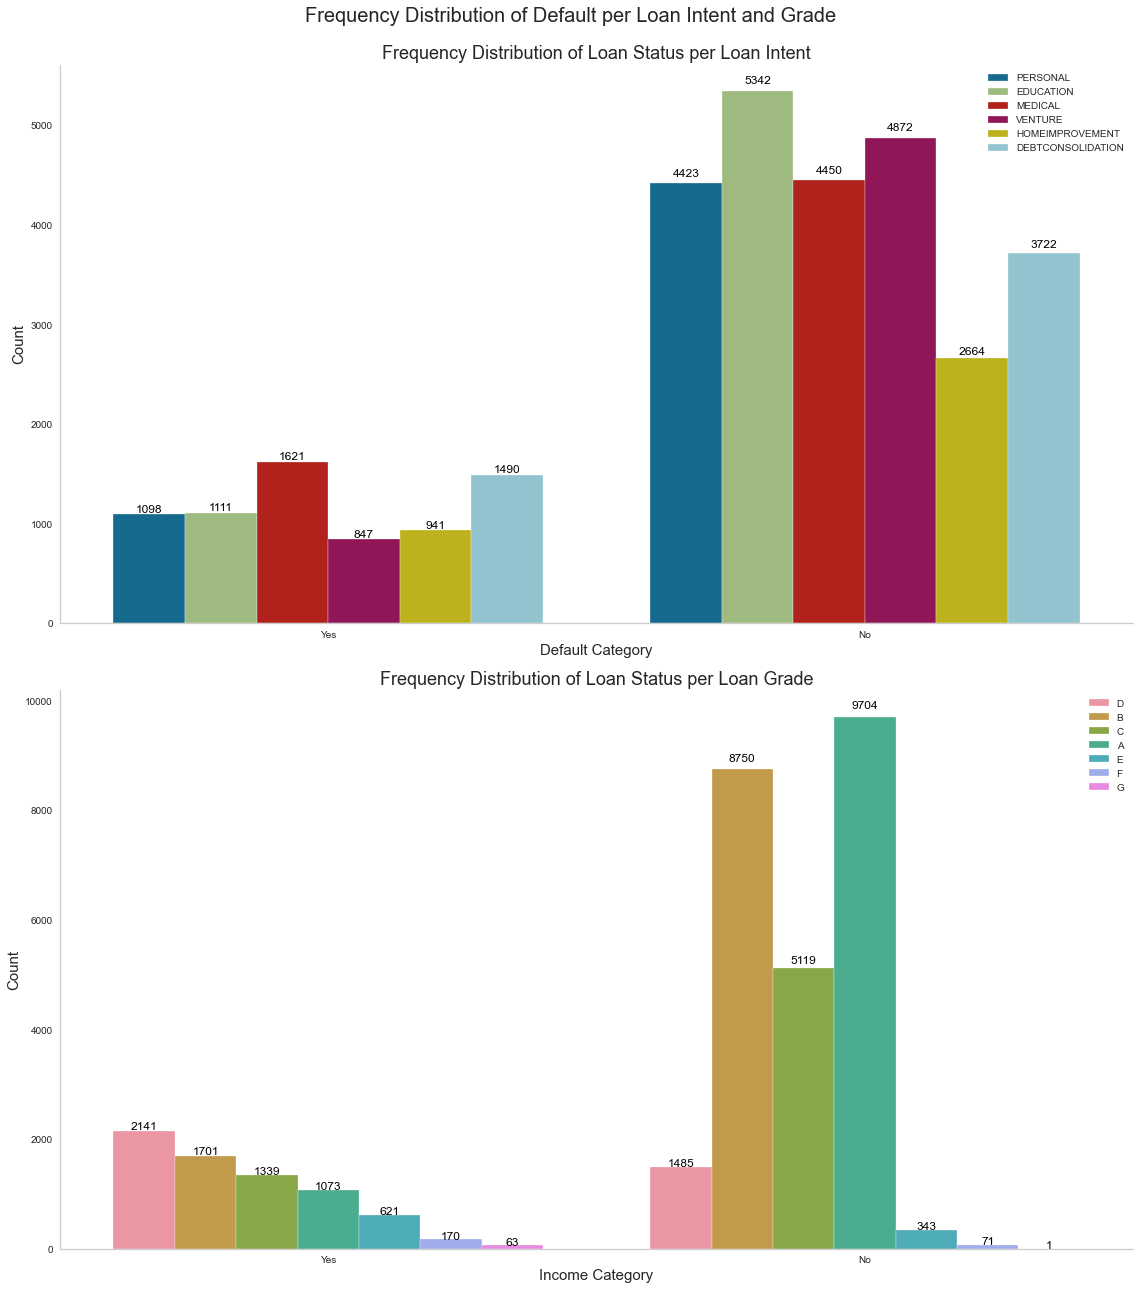

In [27]:
fig, (ax5, ax6) = plt.subplots(2, 1,figsize=(16,18))
fig.suptitle("Frequency Distribution of Default per Loan Intent and Grade", fontsize=20, verticalalignment="bottom")
 
#Plot 1
ax5 = sns.countplot(x='Loan Status', hue='Loan Intent',ax=ax5, data=Credits)
for i in ax5.patches:    
    ax5.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 12, rotation = 0, color = 'black')
ax5.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax5.set_xlabel('Default Category',fontsize=15,fontweight='normal') 
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.set_title('Frequency Distribution of Loan Status per Loan Intent',fontsize=18, fontweight='normal')
ax5.legend(loc='upper right')


#Plot 2
ax6 = sns.countplot(x='Loan Status', hue='Loan Grade',ax=ax6, data=Credits)
for i in ax6.patches:    
    ax6.text(x = i.get_x() + i.get_width()/2, y = i.get_height()*1.015,
            s = f"{i.get_height()}", 
            ha = 'center', size = 12, rotation = 0, color = 'black')
ax6.set_ylabel('Count',fontsize=15,fontweight='normal')    
ax6.set_xlabel('Income Category',fontsize=15,fontweight='normal') 
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
ax6.set_title('Frequency Distribution of Loan Status per Loan Grade',fontsize=18, fontweight='normal')
ax6.legend(loc='upper right')

plt.tight_layout()

### Numerical Plotting In Respect to Target Feature `Default`

### Prepare Data For Machine Learning

### Imbalance Target Feature Checking

In [28]:
print('Distinct value(s) of Loan Status : ', Credits['Loan Status'].unique())
print(Credits['Loan Status'].value_counts()/float(len(Credits)))

Distinct value(s) of Loan Status :  ['Yes' 'No']
No     0.781836
Yes    0.218164
Name: Loan Status, dtype: float64


 - It is rather an imbalanced data.
 - Accuracy will not be the best tool to measure performance of the model. Precision, Recall and F1 Score are preferable.

### Train and Test Splitting 

In [29]:
X = Credits.drop(['Loan Status'], axis=1)
Y = Credits['Loan Status']

In [30]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Splitting to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

### Train and Test Set Profiling

In [31]:
print("Train set dimension :", X_train.ndim)
print("Train set shape :", X_train.shape)
print("Train set size :", X_train.size)

Train set dimension : 2
Train set shape : (24435, 11)
Train set size : 268785


In [32]:
print("Test set dimension :", X_test.ndim)
print("Test set shape :", X_test.shape)
print("Test set size :", X_test.size)

Test set dimension : 2
Test set shape : (8146, 11)
Test set size : 89606


### Defining Numerical and Categorical Features

In [33]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Home Ownership', 'Loan Intent', 'Loan Grade', 'Default']

In [34]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Age',
 'Income',
 'EMP Length',
 'Loan Amount',
 'Loan Int Rate',
 'Loan Percent Inc',
 'Credit History']

### Data Preprocessing 

### Categorical Encoder

In [35]:
# import category encoders
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

# Encode categorical variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['Home Ownership', 'Loan Intent','Default'])
X_train = encoder.fit_transform(X_train)
X_train

,Age,Income,Home Ownership_1,Home Ownership_2,Home Ownership_3,Home Ownership_4,EMP Length,Loan Intent_1,Loan Intent_2,Loan Intent_3,Loan Intent_4,Loan Intent_5,Loan Intent_6,Loan Grade,Loan Amount,Loan Int Rate,Loan Percent Inc,Default_1,Default_2,Credit History
20513,34,50000,1,0,0,0,8.0,1,0,0,0,0,0,B,4800,10.99,0.10,1,0,10
5004,24,37000,0,1,0,0,7.0,0,1,0,0,0,0,A,6250,7.14,0.17,1,0,4
24414,33,50800,1,0,0,0,16.0,1,0,0,0,0,0,E,10000,16.40,0.20,0,1,7
1036,23,75576,1,0,0,0,7.0,1,0,0,0,0,0,B,18000,9.88,0.24,1,0,3
16555,26,75000,0,1,0,0,9.0,0,0,1,0,0,0,C,4000,12.99,0.05,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,23,150000,0,1,0,0,5.0,0,0,0,1,0,0,A,10000,7.14,0.07,1,0,4
22637,30,38168,1,0,0,0,5.0,0,0,0,0,1,0,B,7500,9.76,0.20,1,0,6
10123,22,69000,1,0,0,0,1.0,0,0,0,0,0,1,D,9500,15.33,0.14,0,1,4
5600,25,45149,0,1,0,0,4.0,1,0,0,0,0,0,A,9000,5.79,0.20,1,0,4


In [36]:
# For Test Set
X_test = encoder.transform(X_test)
X_test

,Age,Income,Home Ownership_1,Home Ownership_2,Home Ownership_3,Home Ownership_4,EMP Length,Loan Intent_1,Loan Intent_2,Loan Intent_3,Loan Intent_4,Loan Intent_5,Loan Intent_6,Loan Grade,Loan Amount,Loan Int Rate,Loan Percent Inc,Default_1,Default_2,Credit History
9304,25,27096,1,0,0,0,7.0,0,1,0,0,0,0,A,5000,7.90,0.18,1,0,2
31476,39,98000,0,1,0,0,0.0,0,0,0,0,0,1,D,35000,15.99,0.36,1,0,15
1233,23,25000,0,1,0,0,4.0,0,0,1,0,0,0,A,5000,9.32,0.20,1,0,2
25232,32,45000,1,0,0,0,9.0,0,0,1,0,0,0,A,12000,7.88,0.27,1,0,6
1647,25,63128,1,0,0,0,4.0,0,0,0,1,0,0,A,1500,7.49,0.02,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,24,102400,1,0,0,0,8.0,0,0,0,0,1,0,B,25000,10.36,0.24,1,0,3
8311,22,49000,1,0,0,0,7.0,0,0,0,0,1,0,A,7500,6.62,0.15,1,0,3
3552,25,60000,1,0,0,0,3.0,0,0,0,0,0,1,A,10250,6.62,0.17,1,0,4
17300,22,52000,1,0,0,0,6.0,0,0,0,1,0,0,B,10000,11.71,0.19,1,0,2


### Ordinal Encoder

In [37]:
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder

# Encode categorical variables with one-hot encoding
ordencoder = ce.OrdinalEncoder(cols=['Loan Grade'])
X_train = ordencoder.fit_transform(X_train)
X_train

,Age,Income,Home Ownership_1,Home Ownership_2,Home Ownership_3,Home Ownership_4,EMP Length,Loan Intent_1,Loan Intent_2,Loan Intent_3,Loan Intent_4,Loan Intent_5,Loan Intent_6,Loan Grade,Loan Amount,Loan Int Rate,Loan Percent Inc,Default_1,Default_2,Credit History
20513,34,50000,1,0,0,0,8.0,1,0,0,0,0,0,1,4800,10.99,0.10,1,0,10
5004,24,37000,0,1,0,0,7.0,0,1,0,0,0,0,2,6250,7.14,0.17,1,0,4
24414,33,50800,1,0,0,0,16.0,1,0,0,0,0,0,3,10000,16.40,0.20,0,1,7
1036,23,75576,1,0,0,0,7.0,1,0,0,0,0,0,1,18000,9.88,0.24,1,0,3
16555,26,75000,0,1,0,0,9.0,0,0,1,0,0,0,4,4000,12.99,0.05,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15649,23,150000,0,1,0,0,5.0,0,0,0,1,0,0,2,10000,7.14,0.07,1,0,4
22637,30,38168,1,0,0,0,5.0,0,0,0,0,1,0,1,7500,9.76,0.20,1,0,6
10123,22,69000,1,0,0,0,1.0,0,0,0,0,0,1,5,9500,15.33,0.14,0,1,4
5600,25,45149,0,1,0,0,4.0,1,0,0,0,0,0,2,9000,5.79,0.20,1,0,4


In [38]:
# For Test Set
X_test = ordencoder.transform(X_test)
X_test

,Age,Income,Home Ownership_1,Home Ownership_2,Home Ownership_3,Home Ownership_4,EMP Length,Loan Intent_1,Loan Intent_2,Loan Intent_3,Loan Intent_4,Loan Intent_5,Loan Intent_6,Loan Grade,Loan Amount,Loan Int Rate,Loan Percent Inc,Default_1,Default_2,Credit History
9304,25,27096,1,0,0,0,7.0,0,1,0,0,0,0,2,5000,7.90,0.18,1,0,2
31476,39,98000,0,1,0,0,0.0,0,0,0,0,0,1,5,35000,15.99,0.36,1,0,15
1233,23,25000,0,1,0,0,4.0,0,0,1,0,0,0,2,5000,9.32,0.20,1,0,2
25232,32,45000,1,0,0,0,9.0,0,0,1,0,0,0,2,12000,7.88,0.27,1,0,6
1647,25,63128,1,0,0,0,4.0,0,0,0,1,0,0,2,1500,7.49,0.02,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,24,102400,1,0,0,0,8.0,0,0,0,0,1,0,1,25000,10.36,0.24,1,0,3
8311,22,49000,1,0,0,0,7.0,0,0,0,0,1,0,2,7500,6.62,0.15,1,0,3
3552,25,60000,1,0,0,0,3.0,0,0,0,0,0,1,2,10250,6.62,0.17,1,0,4
17300,22,52000,1,0,0,0,6.0,0,0,0,1,0,0,1,10000,11.71,0.19,1,0,2


### Feature Scaling

In [39]:
cols = X_train.columns

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=[cols])
X_train

,Age,Income,Home Ownership_1,Home Ownership_2,Home Ownership_3,Home Ownership_4,EMP Length,Loan Intent_1,Loan Intent_2,Loan Intent_3,Loan Intent_4,Loan Intent_5,Loan Intent_6,Loan Grade,Loan Amount,Loan Int Rate,Loan Percent Inc,Default_1,Default_2,Credit History
0,1.142857,-0.123554,0.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.441379,0.000000,-0.357143,0.0,0.0,1.2
1,-0.285714,-0.444796,-1.0,1.0,0.0,0.0,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,-0.241379,-0.833333,0.142857,0.0,0.0,0.0
2,1.000000,-0.103786,0.0,0.0,0.0,0.0,2.4,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.275862,1.170996,0.357143,-1.0,1.0,0.6
3,-0.428571,0.508451,0.0,0.0,0.0,0.0,0.6,1.0,0.0,0.0,0.0,0.0,0.0,-0.333333,1.379310,-0.240260,0.642857,0.0,0.0,-0.2
4,0.000000,0.494218,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.666667,-0.551724,0.432900,-0.714286,-1.0,1.0,-0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24430,-0.428571,2.347534,-1.0,1.0,0.0,0.0,0.2,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.275862,-0.833333,-0.571429,0.0,0.0,0.0
24431,0.571429,-0.415934,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0,0.0,-0.333333,-0.068966,-0.266234,0.357143,0.0,0.0,0.4
24432,-0.571429,0.345952,0.0,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.206897,0.939394,-0.071429,-1.0,1.0,0.0
24433,-0.142857,-0.243427,-1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.137931,-1.125541,0.357143,0.0,0.0,0.0


In [40]:
# For Test Set
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=[cols])
X_test

,Age,Income,Home Ownership_1,Home Ownership_2,Home Ownership_3,Home Ownership_4,EMP Length,Loan Intent_1,Loan Intent_2,Loan Intent_3,Loan Intent_4,Loan Intent_5,Loan Intent_6,Loan Grade,Loan Amount,Loan Int Rate,Loan Percent Inc,Default_1,Default_2,Credit History
0,-0.142857,-0.689532,0.0,0.0,0.0,0.0,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,-0.413793,-0.668831,0.214286,0.0,0.0,-0.4
1,1.857143,1.062568,-1.0,1.0,0.0,0.0,-0.8,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,3.724138,1.082251,1.500000,0.0,0.0,2.2
2,-0.428571,-0.741326,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,-0.413793,-0.361472,0.357143,0.0,0.0,-0.4
3,0.857143,-0.247109,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.551724,-0.673160,0.857143,0.0,0.0,0.4
4,-0.142857,0.200850,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,-0.896552,-0.757576,-0.928571,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,-0.285714,1.171296,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,1.0,0.0,-0.333333,2.344828,-0.136364,0.642857,0.0,0.0,-0.2
8142,-0.571429,-0.148265,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,-0.068966,-0.945887,0.000000,0.0,0.0,-0.2
8143,-0.142857,0.123554,0.0,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.310345,-0.945887,0.142857,0.0,0.0,0.0
8144,-0.571429,-0.074133,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,1.0,0.0,0.0,-0.333333,0.275862,0.155844,0.285714,0.0,0.0,-0.4


### Target Feature Label Encoder

In [41]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables with one-hot encoding
labencoder = LabelEncoder()
y_train = labencoder.fit_transform(y_train)
y_train

array([0, 1, 0, ..., 1, 0, 0])

In [42]:
# For Test Set
y_test = labencoder.transform(y_test)
y_test

array([1, 0, 0, ..., 0, 0, 0])

### Machine Learning Model on Training Set

In [43]:
X_train.columns = X_train.columns.get_level_values(0)
X_test.columns = X_test.columns.get_level_values(0)

### Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score

# Choosing Model
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=50)
forest_clf.fit(X_train, y_train)
predictions = forest_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = forest_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

### Stochastic Gradient Boosting

In [ ]:
# Choosing Model
from sklearn.ensemble import GradientBoostingClassifier
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train, y_train)
predictions = SGB_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = SGB_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

### LightGBM

In [ ]:
# Choosing Model
import lightgbm as lgb
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
predictions = LGBM_clf.predict(X_train)

# Evaluating Model Selection
print('*****************Train*******************')
print('Train Accuracy',accuracy_score(y_train, predictions))
print('Train Precision',precision_score(y_train, predictions))
print('Train Recall',recall_score(y_train, predictions))
print('Train F1 Score',f1_score(y_train, predictions))
print('****************************************')
# Predit Test Set
final_predictions = LGBM_clf.predict(X_test)

# Model Evaluation Test Set
print('******************Test*******************')
print('Test Accuracy',accuracy_score(y_test, final_predictions))
print('Test Precision',precision_score(y_test, final_predictions))
print('Test Recall',recall_score(y_test, final_predictions))
print('Test F1 Score',f1_score(y_test, final_predictions))
print('*****************************************')

### Find Importance Features with Random Forest Model

In [ ]:
# view the feature scores using 100 estimators
forest_clf = RandomForestClassifier(random_state=50,n_estimators=100)
forest_clf.fit(X_train, y_train)
predictions = forest_clf.predict(X_train)

feature_scores = pd.Series(forest_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores.to_string())

### Find Importance Features with SGB Model

In [ ]:
# view the feature scores using 100 estimators
SGB_clf = GradientBoostingClassifier()
SGB_clf.fit(X_train, y_train)
predictions = SGB_clf.predict(X_train)

feature_scores2 = pd.Series(SGB_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores2.to_string())

### Find Importance Features with LightGBM Model

In [ ]:
# view the feature scores using 100 estimators
LGBM_clf = lgb.LGBMClassifier()
LGBM_clf.fit(X_train, y_train)
predictions = LGBM_clf.predict(X_train)

feature_scores3 = pd.Series(LGBM_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores3.to_string())

### Model Implementation using PyCaret

### Preprocessing with Pycaret

In [44]:
# Preprocessing 
grid = setup(data=Credits , target= 'Loan Status', data_split_shuffle= True, data_split_stratify= True, session_id= 50,
            ordinal_features = {'Loan Grade' : ['G','F','E','D','C','B','A']}, normalize = True, normalize_method = 'robust',
            ignore_low_variance = True, fix_imbalance = False, remove_outliers = False) 

,Description,Value
0,session_id,50
1,Target,Loan Status
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(32581, 12)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,4
8,Ordinal Features,True
9,High Cardinality Features,False


### Comparing Models Performance

In [47]:
## Evaluate and compare models
best = compare_models(n_select = 3, sort = 'auc')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9355,0.9471,0.7216,0.9769,0.8300,0.7913,0.8052,0.0760
rf,Random Forest Classifier,0.9336,0.9296,0.7164,0.9720,0.8248,0.7850,0.7989,0.4420
gbc,Gradient Boosting Classifier,0.9293,0.9275,0.7116,0.9523,0.8144,0.7718,0.7844,0.5410
et,Extra Trees Classifier,0.9201,0.9125,0.6814,0.9348,0.7880,0.7403,0.7545,0.3710
ada,Ada Boost Classifier,0.8858,0.8972,0.6565,0.7851,0.7150,0.6443,0.6484,0.1810
knn,K Neighbors Classifier,0.8929,0.8615,0.6117,0.8565,0.7135,0.6500,0.6639,0.3310
lr,Logistic Regression,0.8527,0.8604,0.5025,0.7385,0.5979,0.5117,0.5260,0.6590
lda,Linear Discriminant Analysis,0.8526,0.8587,0.5120,0.7318,0.6023,0.5153,0.5278,0.0390
dt,Decision Tree Classifier,0.8881,0.8431,0.7634,0.7347,0.7486,0.6766,0.6770,0.0390
qda,Quadratic Discriminant Analysis,0.6556,0.8351,0.8414,0.3786,0.5198,0.3117,0.3720,0.0210


### Creating ML Models

### LGBM Classifier

In [53]:
LGBM = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9303,0.9365,0.7042,0.9669,0.8149,0.7733,0.7880
1,0.9325,0.9411,0.7048,0.9804,0.8201,0.7799,0.7960
2,0.9334,0.9459,0.7068,0.9832,0.8224,0.7828,0.7989
3,0.9347,0.9499,0.7209,0.9729,0.8281,0.7889,0.8024
4,0.9369,0.9503,0.7209,0.9863,0.8329,0.7952,0.8100
5,0.9369,0.9507,0.7369,0.9658,0.8360,0.7978,0.8090
6,0.9368,0.9414,0.7223,0.9836,0.8329,0.7951,0.8095
7,0.9430,0.9609,0.7525,0.9816,0.8519,0.8174,0.8285
8,0.9399,0.9495,0.7364,0.9839,0.8423,0.8062,0.8191


In [57]:
print(LGBM)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Random Forest Classifier

In [54]:
RF = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9290,0.9182,0.6982,0.9666,0.8107,0.7684,0.7838
1,0.9334,0.9305,0.7068,0.9832,0.8224,0.7828,0.7989
2,0.9316,0.9257,0.7048,0.9750,0.8182,0.7774,0.7929
3,0.9338,0.9257,0.7209,0.9677,0.8262,0.7864,0.7994
4,0.9338,0.9316,0.7129,0.9780,0.8246,0.7851,0.8000
5,0.9351,0.9358,0.7329,0.9605,0.8314,0.7922,0.8033
6,0.9355,0.9281,0.7203,0.9781,0.8297,0.7910,0.8051
7,0.9382,0.9380,0.7364,0.9734,0.8385,0.8011,0.8131
8,0.9364,0.9398,0.7284,0.9731,0.8331,0.7949,0.8076


In [58]:
print(RF)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)


### GBC Classifier

In [55]:
GBC = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9233,0.9111,0.6922,0.9399,0.7972,0.7512,0.7646
1,0.9263,0.9257,0.6948,0.9558,0.8047,0.7607,0.7754
2,0.9285,0.9228,0.7028,0.9589,0.8111,0.7683,0.7824
3,0.9290,0.9297,0.7149,0.9468,0.8146,0.7718,0.7834
4,0.9285,0.9325,0.6988,0.9640,0.8102,0.7676,0.7827
5,0.9299,0.9349,0.7229,0.9424,0.8182,0.7757,0.7861
6,0.9346,0.9226,0.7203,0.9728,0.8277,0.7885,0.8021
7,0.9325,0.9336,0.7344,0.9432,0.8258,0.7847,0.7941
8,0.9355,0.9374,0.7284,0.9679,0.8312,0.7924,0.8046


In [59]:
print(GBC)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=50, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### ML Models Hyperpaarmeters Tuning

### LGBM Classifier

In [63]:
tuned_LGBM = tune_model(LGBM, optimize = 'F1', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9242,0.9130,0.6881,0.9500,0.7981,0.7529,0.7677
1,0.9268,0.9269,0.6928,0.9610,0.8051,0.7615,0.7770
2,0.9255,0.9299,0.6908,0.9556,0.8019,0.7574,0.7725
3,0.9290,0.9258,0.7108,0.9516,0.8138,0.7710,0.7836
4,0.9312,0.9332,0.7008,0.9776,0.8164,0.7754,0.7917
5,0.9320,0.9328,0.7249,0.9525,0.8233,0.7822,0.7933
6,0.9351,0.9222,0.7082,0.9915,0.8263,0.7877,0.8046
7,0.9333,0.9430,0.7143,0.9726,0.8237,0.7837,0.7979
8,0.9355,0.9388,0.7203,0.9781,0.8297,0.7910,0.8051


### Random Forest Classifier

In [64]:
tuned_RF = tune_model(RF, optimize = 'F1', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9097,0.8789,0.6922,0.8665,0.7696,0.7143,0.7213
1,0.9084,0.8900,0.6888,0.8640,0.7665,0.7104,0.7174
2,0.9110,0.8855,0.6928,0.8734,0.7727,0.7183,0.7257
3,0.9145,0.8998,0.7048,0.8797,0.7826,0.7302,0.7372
4,0.9167,0.8938,0.7108,0.8850,0.7884,0.7373,0.7442
5,0.9132,0.8989,0.7209,0.8589,0.7838,0.7301,0.7344
6,0.9197,0.8940,0.7123,0.8985,0.7946,0.7456,0.7533
7,0.9211,0.8967,0.7223,0.8953,0.7996,0.7511,0.7578
8,0.9241,0.8976,0.7264,0.9070,0.8067,0.7602,0.7675


### GBC Classifier

In [65]:
tuned_GBC = tune_model(GBC, optimize = 'F1', choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9272,0.9283,0.7062,0.9461,0.8088,0.7650,0.7775
1,0.9329,0.9341,0.7269,0.9551,0.8255,0.7850,0.7962
2,0.9373,0.9338,0.7410,0.9634,0.8377,0.7997,0.8102
3,0.9307,0.9304,0.7269,0.9427,0.8209,0.7788,0.7889
4,0.9347,0.9411,0.7390,0.9509,0.8316,0.7919,0.8016
5,0.9351,0.9332,0.7510,0.9397,0.8348,0.7951,0.8028
6,0.9360,0.9304,0.7425,0.9535,0.8348,0.7959,0.8055
7,0.9364,0.9424,0.7545,0.9422,0.8380,0.7990,0.8067
8,0.9386,0.9416,0.7525,0.9565,0.8423,0.8049,0.8138


### Model Interpretation

### LGBM Classifier

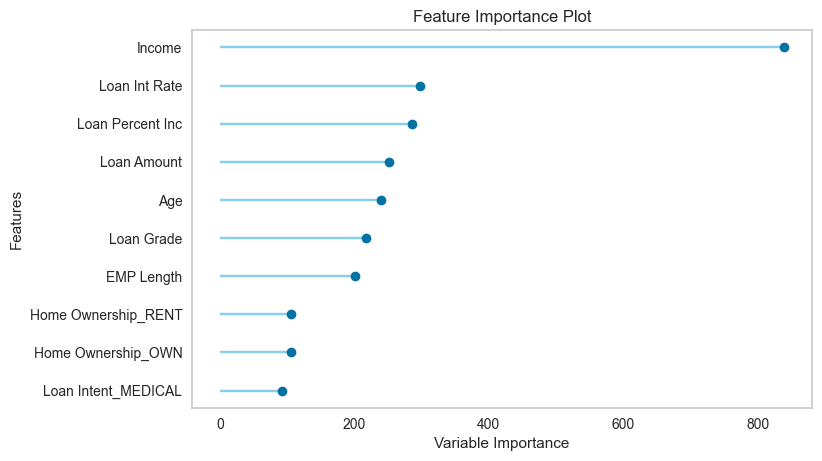

In [66]:
from pycaret.utils import check_metric

# Display feature and their importance
plot_model(tuned_LGBM, plot = 'feature')

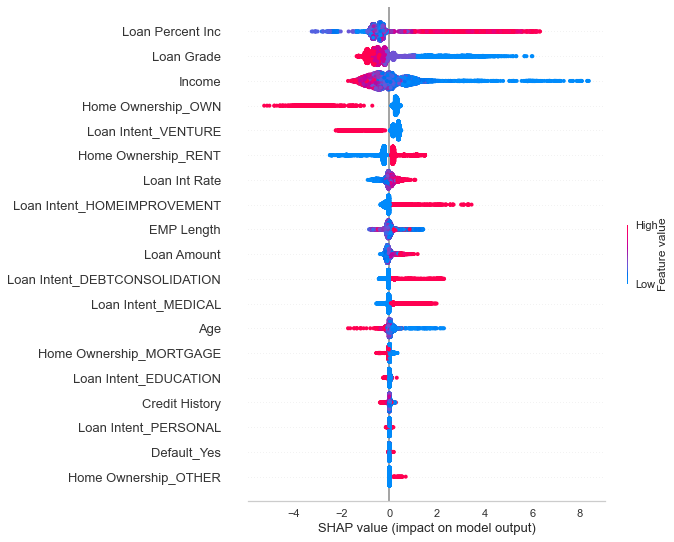

In [67]:
# Shap Model Interpretation Final Model
interpret_model(tuned_LGBM)

### Random Forest Classifer

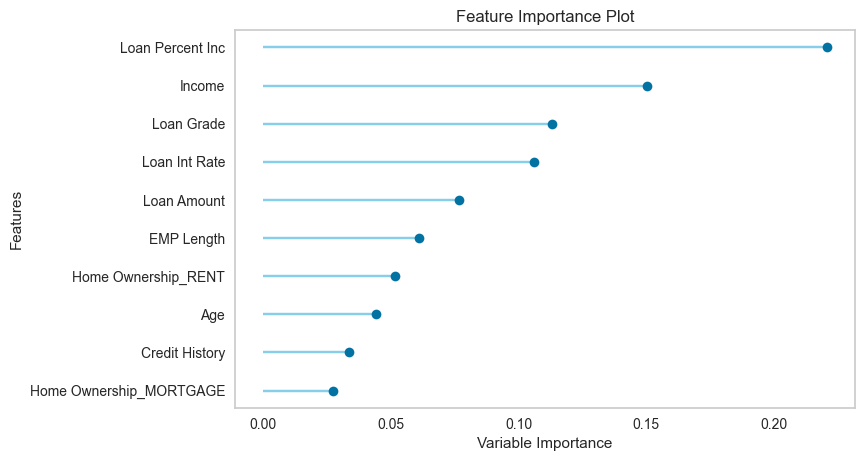

In [68]:
# Display feature and their importance
plot_model(tuned_RF, plot = 'feature')

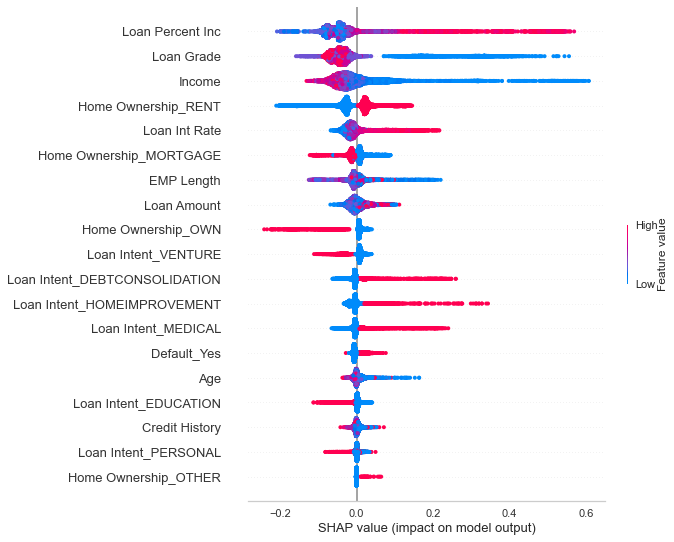

In [72]:
# Shap Model Interpretation Final Model
interpret_model(tuned_RF)

### GBC Classifier

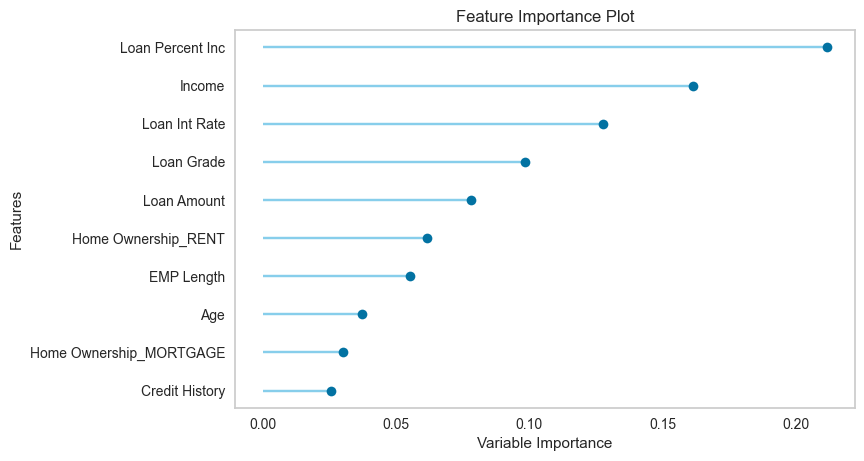

In [69]:
# Display feature and their importance
plot_model(tuned_GBC, plot = 'feature')

### Choosing The Best Model

In [82]:
print(tuned_LGBM)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Predicting Model on Test / Hold Out Sample

In [75]:
predict_model(tuned_LGBM)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9372,0.9475,0.7276,0.9792,0.8349,0.7971,0.8105


,Age,Income,EMP Length,Loan Grade,Loan Amount,Loan Int Rate,Loan Percent Inc,Credit History,Home Ownership_MORTGAGE,Home Ownership_OTHER,...,Loan Intent_DEBTCONSOLIDATION,Loan Intent_EDUCATION,Loan Intent_HOMEIMPROVEMENT,Loan Intent_MEDICAL,Loan Intent_PERSONAL,Loan Intent_VENTURE,Default_Yes,Loan Status,Label,Score
0,-0.571429,-0.911796,-0.6,5.0,-0.694444,-0.222944,0.142857,-0.2,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,0.9943
1,-0.142857,-1.232157,-0.8,5.0,-0.972222,-0.292208,0.357143,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Yes,Yes,0.9890
2,-0.285714,-0.172502,0.6,4.0,0.277778,0.699134,0.428571,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,No,No,0.8722
3,0.142857,0.337611,-0.8,6.0,0.277778,-0.880952,0.000000,0.4,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,No,No,0.9988
4,-0.285714,0.773794,0.8,4.0,1.138889,0.000000,0.285714,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,No,No,0.9498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,-0.285714,-0.443576,0.8,3.0,0.347222,0.000000,0.928571,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,No,No,0.8344
9771,0.285714,-0.394290,0.4,3.0,0.000000,0.848485,0.428571,0.6,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Yes,Yes,0.7152
9772,1.142857,0.418933,0.8,4.0,0.277778,0.541126,-0.071429,0.8,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,No,No,0.9114
9773,-0.714286,-0.621993,-0.6,5.0,0.069444,-0.080087,1.000000,-0.4,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,No,No,0.7811


### Classification Reports

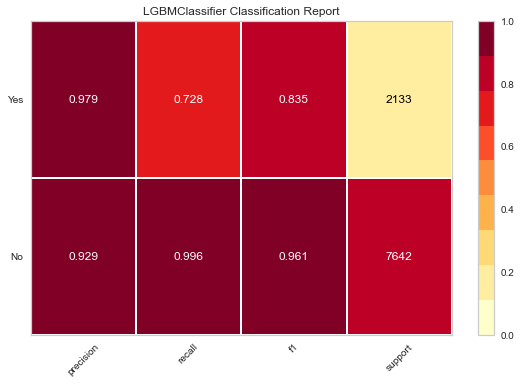

In [73]:
# Plotting the classification report
plot_model(tuned_LGBM,plot='class_report')

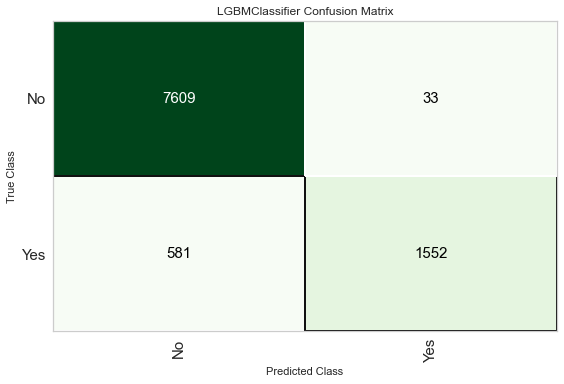

In [74]:
# Plotting the confusion matrix
plot_model(tuned_LGBM,plot='confusion_matrix')

### Finalize Model 

In [76]:
final_model = finalize_model(tuned_LGBM)
print(final_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=50, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


### Predict On Unseen Data

In [81]:
# New Unseen Data
new_data = Credits.copy()
unseen_predictions = predict_model(final_model, data=new_data)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0,0.9732,0,0,0,0,0


,Age,Income,Home Ownership,EMP Length,Loan Intent,Loan Grade,Loan Amount,Loan Int Rate,Loan Status,Loan Percent Inc,Default,Credit History,Label,Score
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Yes,0.59,Yes,3,Yes,0.9954
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,No,0.10,No,2,No,0.9777
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,Yes,0.57,No,3,Yes,0.9956
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,Yes,0.53,No,2,Yes,0.9953
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Yes,0.55,Yes,4,Yes,0.9982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,No,0.11,No,30,No,0.9066
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,No,0.15,No,19,No,0.9869
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,Yes,0.46,No,28,Yes,0.9770
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,No,0.10,No,26,No,0.9204
